### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from google.colab import drive

### Mount Google Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read the data

In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/capstone_1_online_shoppers/online_shoppers_intention.csv'
df = pd.read_csv(file_path)

# First look

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Make the column and categorical names lowercase and replace spaces with underscores, missing values checking

In [ ]:
df.columns  = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical:
  df[c] = df[c].str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,feb,1,1,1,1,returning_visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,feb,2,2,1,2,returning_visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,feb,4,1,9,3,returning_visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,feb,3,2,2,4,returning_visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,feb,3,3,1,4,returning_visitor,True,False


In [ ]:
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [ ]:
# Reset the Dataframe indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
# Define features and target variable
X_train = df_train.drop('revenue', axis=1)
X_val = df_val.drop('revenue', axis=1)
X_test = df_test.drop('revenue', axis=1)

In [ ]:
# Setup the target arrays
y_train = df_train.revenue.values
y_val = df_val.revenue.values
y_test = df_test.revenue.values

In [ ]:
# Convert boolean columns to numerical (True -> 1, False -> 0)
bool_columns = X_train.select_dtypes(include='bool').columns
for col in bool_columns:
  X_train[col] = X_train[col].astype(int)
  X_val[col] = X_val[col].astype(int)
  X_test[col] = X_test[col].astype(int)


In [ ]:
# Convert categorical columns to numerical using DictVectorizer
dv = DictVectorizer(sparse=False)
train_dict = X_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = X_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = X_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

# Exploratory Data Analysis (EDA)

In [ ]:
# Check for missing values
print(df.isnull().sum())

administrative             0
administrative_duration    0
informational              0
informational_duration     0
productrelated             0
productrelated_duration    0
bouncerates                0
exitrates                  0
pagevalues                 0
specialday                 0
month                      0
operatingsystems           0
browser                    0
region                     0
traffictype                0
visitortype                0
weekend                    0
revenue                    0
dtype: int64


revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64


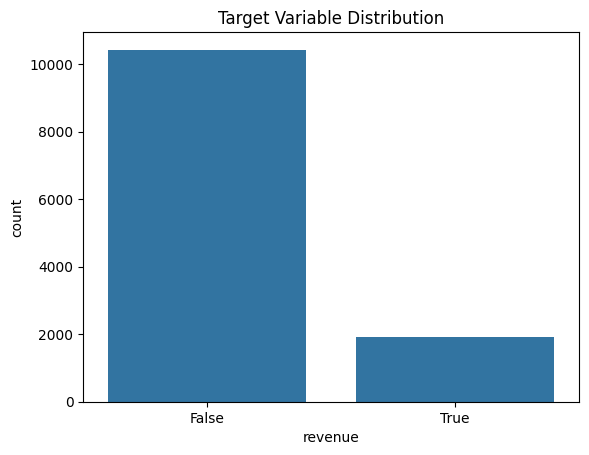

In [ ]:
# Target variable distribution
print(df['revenue'].value_counts(normalize=True))
sns.countplot(x='revenue', data=df)
plt.title('Target Variable Distribution')
plt.show()

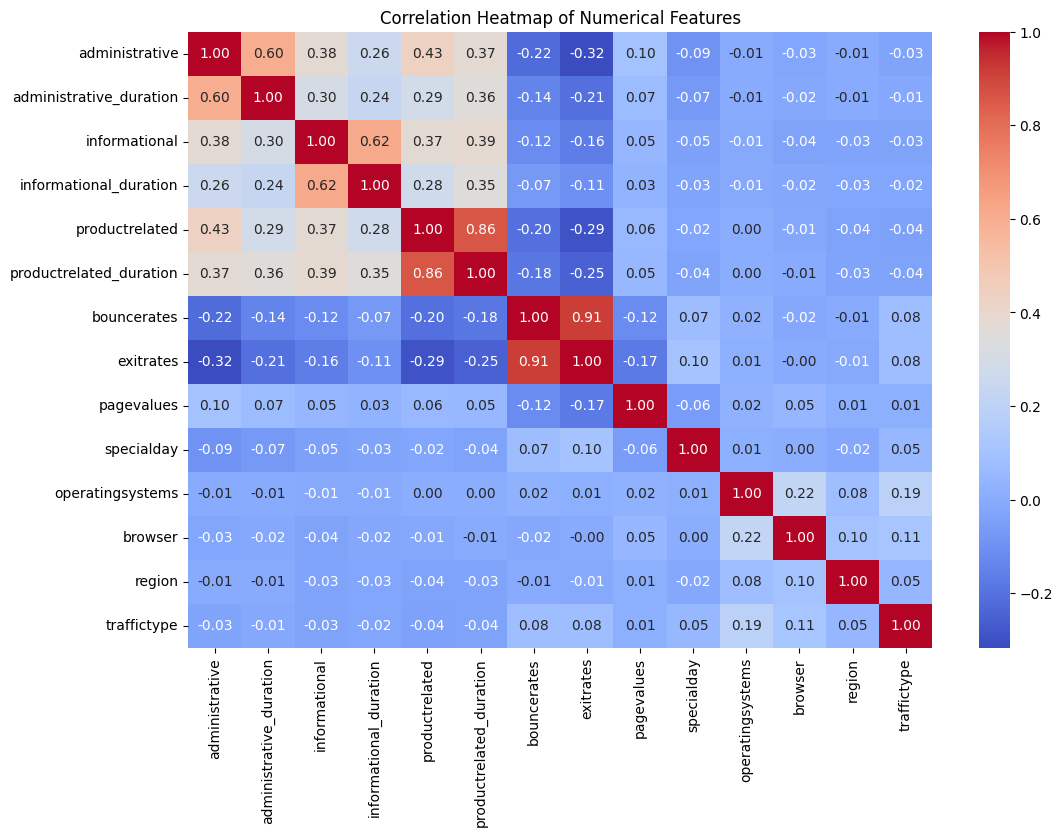

In [ ]:
# Correlation heatmap for numerical features
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

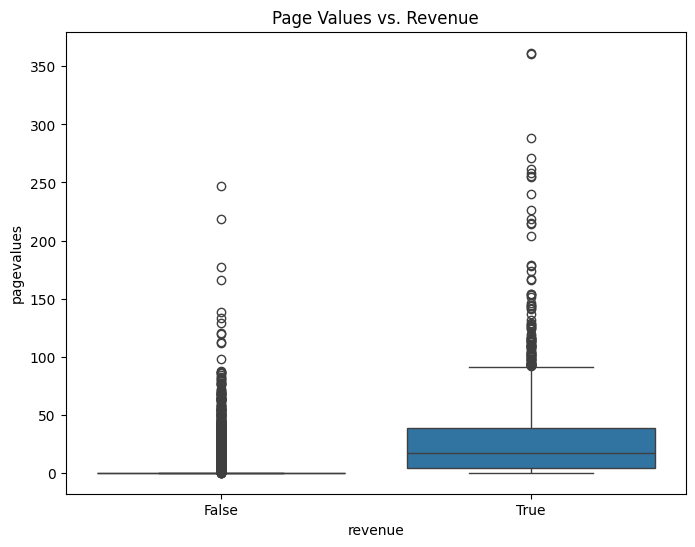

In [ ]:
# Explore relationship between 'pagevalues' and 'revenue'
plt.figure(figsize=(8,6))
sns.boxplot(x='revenue', y='pagevalues', data=df)
plt.title('Page Values vs. Revenue')
plt.show()

specialday
0.0    0.898540
0.6    0.028467
0.8    0.026358
0.4    0.019708
0.2    0.014436
1.0    0.012490
Name: proportion, dtype: float64


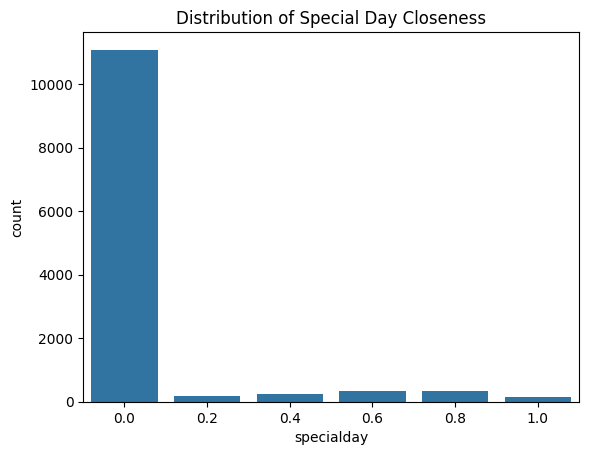

In [ ]:
# Distribution of 'specialday'
print(df['specialday'].value_counts(normalize=True))
sns.countplot(x='specialday', data=df)
plt.title('Distribution of Special Day Closeness')
plt.show()

visitortype        revenue
new_visitor        False      0.750885
                   True       0.249115
other              False      0.811765
                   True       0.188235
returning_visitor  False      0.860677
                   True       0.139323
Name: proportion, dtype: float64


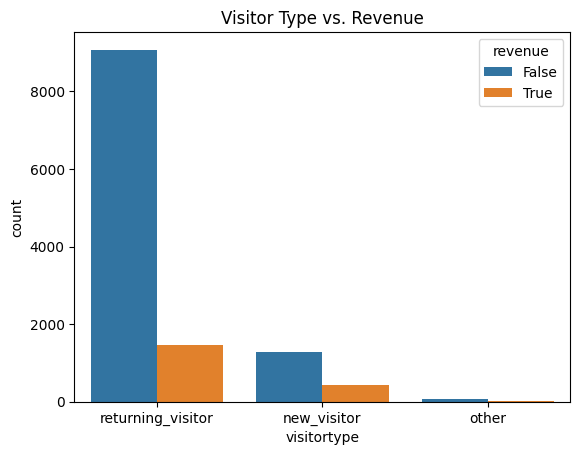

In [ ]:
# 'visitor_type' vs. 'revenue'
print(df.groupby('visitortype')['revenue'].value_counts(normalize=True))
sns.countplot(x='visitortype', hue='revenue', data=df)
plt.title('Visitor Type vs. Revenue')
plt.show()

# Model training and tuning

### Logistic Regression

In [ ]:
lr = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict_proba(X_val)[:, 1]
auc_lr = roc_auc_score(y_val, y_pred_lr)
print('Logistic Regression val_auc:', auc_lr)


Logistic Regression val_auc: 0.9010103255767996


### Linear SVM

In [ ]:
svm = LinearSVC(C=1.0, max_iter=1000, random_state=1)
svm.fit(X_train, y_train)

y_pred_svm = svm.decision_function(X_val)  # Note: Use decision_function for SVM
auc_svm = roc_auc_score(y_val, y_pred_svm)
print('Linear SVM val_auc:', auc_svm)

Linear SVM val_auc: 0.9108270342374389


### SGDClassifier

In [ ]:
sgd = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, max_iter=1000, random_state=1, n_jobs=-1)
sgd.fit(X_train, y_train)

y_pred_sgd = sgd.predict_proba(X_val)[:, 1]
auc_sgd = roc_auc_score(y_val, y_pred_sgd)
print('SGDClassifier val_auc:', auc_sgd)

SGDClassifier val_auc: 0.6283360505903858


### Decision trees

Decision Tree val_auc: 0.9222253100143274


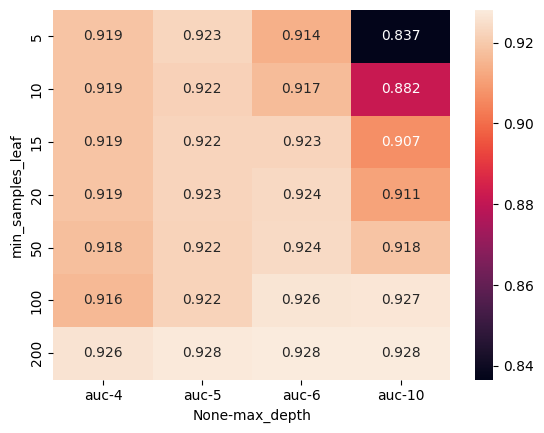

In [ ]:
scores = []

for depth in [4, 5, 6, 10]:
    for s in [5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((depth, s, auc))

columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_val)[:, 1]
auc_dt = roc_auc_score(y_val, y_pred_dt)
print('Decision Tree val_auc:', auc_dt)

### Ensembles and random forest

In [ ]:
# Find nax_depth
scores = []

for d in [5, 10, 15]:
  for n in range(10, 301, 10):
    rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((d, n, auc))

columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)



In [ ]:
average_auc_by_depth = df_scores.groupby('max_depth')['auc'].mean()
best_max_depth = average_auc_by_depth.idxmax()
best_avg_auc = average_auc_by_depth.max()

print(f"Best max_depth: {best_max_depth} (Average AUC: {best_avg_auc:.4f})")

Best max_depth: 15 (Average AUC: 0.9380)


In [ ]:
# Best 'max_depth'
max_depth = 15

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 301, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

# Find the best combination of min_samples_leaf and n_estimators
best_combination = df_scores.loc[df_scores['auc'].idxmax()]

best_min_samples_leaf = best_combination['min_samples_leaf']
best_n_estimators = best_combination['n_estimators']
best_auc = best_combination['auc']

print(f"Best min_samples_leaf: {best_min_samples_leaf}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best AUC: {best_auc:.4f}")

Best min_samples_leaf: 3.0
Best n_estimators: 150.0
Best AUC: 0.9401


In [ ]:
# Best 'min_samples_leaf' and 'n_estimators'
min_samples_leaf = 3
n_estimators = 150

rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_val)[:, 1]
auc_rf = roc_auc_score(y_val, y_pred_rf)
print('Random Forest val_auc:', auc_rf)

Random Forest val_auc: 0.9400832468751544


### XGBoost (eXtreme Gradient Boosting)

In [ ]:
features = dv.get_feature_names_out()
features = list(features)

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [ ]:
# # Tuning max_depth
# scores = {}  # Initialize scores dictionary

In [ ]:
# %%capture output
# xgb_params = {
#     'eta': 0.3,
#     'max_depth': 2,  # Start with max_depth=2
#     'min_child_weight': 1,
#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',
#     'nthread': 8,
#     'seed': 1,
#     'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                   verbose_eval=5,
#                   evals=watchlist)

# # Parse output directly after training
# key = 'max_depth=%s' % (xgb_params['max_depth'])
# scores[key] = parse_xgb_output(output)



In [ ]:
scores

[(1, 10, 0.9190597055481449),
 (1, 20, 0.9326669877970457),
 (1, 30, 0.934742601650116),
 (1, 40, 0.9364235956721506),
 (1, 50, 0.9370695617805445),
 (1, 60, 0.9367255817400326),
 (1, 70, 0.9375438466478929),
 (1, 80, 0.9378872091299837),
 (1, 90, 0.9383509955041747),
 (1, 100, 0.9388666567857319),
 (1, 110, 0.9383281458425966),
 (1, 120, 0.9389247072773085),
 (1, 130, 0.9395262091793883),
 (1, 140, 0.9399053900498987),
 (1, 150, 0.9394595128699175),
 (1, 160, 0.9392013734499283),
 (1, 170, 0.9394866854404427),
 (1, 180, 0.9392087841509806),
 (1, 190, 0.9392458376562421),
 (1, 200, 0.9393681142236056),
 (1, 210, 0.939377995158342),
 (1, 220, 0.9395348549972827),
 (1, 230, 0.9396917148362236),
 (1, 240, 0.9397596462625365),
 (1, 250, 0.9394965663751791),
 (1, 260, 0.9395472061657033),
 (1, 270, 0.9399473840225285),
 (1, 280, 0.9399239168025295),
 (1, 290, 0.9400140803319995),
 (1, 300, 0.9398312830393756),
 (3, 10, 0.9219264117385505),
 (3, 20, 0.9331882071043921),
 (3, 30, 0.9337162195

In [ ]:
# %%capture output

# xgb_params = {
# 'eta': 0.3,
# 'max_depth': 4,
# 'min_child_weight': 1,

# 'objective': 'binary:logistic',
# 'eval_metric': 'auc',

# 'nthread': 8,
# 'seed': 1,
# 'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                 verbose_eval=5,
#                 evals=watchlist)

# key = 'max_depth=%s' % (xgb_params['max_depth'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# %%capture output

# xgb_params = {
# 'eta': 0.3,
# 'max_depth': 8,
# 'min_child_weight': 1,

# 'objective': 'binary:logistic',
# 'eval_metric': 'auc',

# 'nthread': 8,
# 'seed': 1,
# 'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                 verbose_eval=5,
#                 evals=watchlist)

# key = 'max_depth=%s' % (xgb_params['max_depth'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# %%capture output

# xgb_params = {
# 'eta': 0.3,
# 'max_depth': 10,
# 'min_child_weight': 1,

# 'objective': 'binary:logistic',
# 'eval_metric': 'auc',

# 'nthread': 8,
# 'seed': 1,
# 'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                 verbose_eval=5,
#                 evals=watchlist)

# key = 'max_depth=%s' % (xgb_params['max_depth'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# # Plot for visializing

# for max_depth, df_score in scores.items():
#   plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
# plt.legend()

In [ ]:
# # Best 'max_depth'
# max_depth = 4

In [ ]:
# # #### Tuning 'eta'

# scores = {}

In [ ]:
# %%capture output

# xgb_params = {
#     'eta': 0.3,
#     'max_depth': 4,
#     'min_child_weight': 1,

#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',

#     'nthread': 8,
#     'seed': 1,
#     'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                   verbose_eval=5,
#                   evals=watchlist)

# key = 'eta=%s' % (xgb_params['eta'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# %%capture output

# xgb_params = {
#     'eta': 0.1,
#     'max_depth': 4,
#     'min_child_weight': 1,

#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',

#     'nthread': 8,
#     'seed': 1,
#     'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                   verbose_eval=5,
#                   evals=watchlist)

# key = 'eta=%s' % (xgb_params['eta'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# %%capture output

# xgb_params = {
#     'eta': 0.05,
#     'max_depth': 4,
#     'min_child_weight': 1,

#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',

#     'nthread': 8,
#     'seed': 1,
#     'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                   verbose_eval=5,
#                   evals=watchlist)

# key = 'eta=%s' % (xgb_params['eta'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# %%capture output

# xgb_params = {
#     'eta': 0.01,
#     'max_depth': 4,
#     'min_child_weight': 1,

#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',

#     'nthread': 8,
#     'seed': 1,
#     'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                   verbose_eval=5,
#                   evals=watchlist)

# key = 'eta=%s' % (xgb_params['eta'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# for eta, df_score in scores.items():
#     plt.plot(df_score.num_iter, df_score.val_auc, label=eta)


# plt.legend()

In [ ]:
# # Eta all near 0.935 so we take 0.01
# eta = 0.1

In [ ]:
# # Tuning 'min_child_weight'
# scores = {}

In [ ]:
# %%capture output

# xgb_params = {
#     'eta': 0.1,
#     'max_depth': 4,
#     'min_child_weight': 1,

#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',

#     'nthread': 8,
#     'seed': 1,
#     'verbosity': 1,
# }
# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                   verbose_eval=5,
#                   evals=watchlist)

# key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# %%capture output

# xgb_params = {
#     'eta': 0.1,
#     'max_depth': 4,
#     'min_child_weight': 5,

#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',

#     'nthread': 8,
#     'seed': 1,
#     'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                   verbose_eval=5,
#                   evals=watchlist)

# key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# %%capture output

# xgb_params = {
#     'eta': 0.1,
#     'max_depth': 4,
#     'min_child_weight': 10,

#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',

#     'nthread': 8,
#     'seed': 1,
#     'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                   verbose_eval=5,
#                   evals=watchlist)

# key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# %%capture output

# xgb_params = {
#     'eta': 0.1,
#     'max_depth': 4,
#     'min_child_weight': 20,

#     'objective': 'binary:logistic',
#     'eval_metric': 'auc',

#     'nthread': 8,
#     'seed': 1,
#     'verbosity': 1,
# }

# model = xgb.train(xgb_params, dtrain, num_boost_round=200,
#                   verbose_eval=5,
#                   evals=watchlist)

# key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
# scores[key] = parse_xgb_output(output)

In [ ]:
# for min_child_weight, df_score in scores.items():
#     plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)


# plt.legend()

In [ ]:
# # Best 'min_child_weight'
# min_child_weight = 10

In [ ]:
# Final model (was taken 3 after additional analysis)
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb = xgb.train(xgb_params, dtrain, num_boost_round=200)

y_pred_xgb = model_xgb.predict(dval)
auc_xgb = roc_auc_score(y_val, y_pred_xgb)
print('XGBoost val_auc:', auc_xgb)


XGBoost val_auc: 0.9411812657477399


### Selecting the final model

In [ ]:
# Evaluate all models
print('Decision Tree val_auc:', auc_dt)
print('Random Forest val_auc:', auc_rf)
print('Logistic Regression val_auc:', auc_lr)
print('Linear SVM val_auc:', auc_svm)
print('SGDClassifier val_auc:', auc_sgd)
print('XGBoost val_auc:', auc_xgb)

Decision Tree val_auc: 0.9222253100143274
Random Forest val_auc: 0.9400832468751544
Logistic Regression val_auc: 0.9010103255767996
Linear SVM val_auc: 0.9108270342374389
SGDClassifier val_auc: 0.6283360505903858
XGBoost val_auc: 0.9411812657477399


### Best model: XGBoost

In [ ]:
df_train_full = df_train_full.reset_index(drop=True)
X_train_full = df_train_full.drop('revenue', axis=1)
y_train_full = df_train_full.revenue.values

# Convert boolean columns to numerical (True -> 1, False -> 0)
bool_columns = X_train_full.select_dtypes(include='bool').columns
for col in bool_columns:
    X_train_full[col] = X_train_full[col].astype(int)

# Apply DictVectorizer to X_train_full
dv = DictVectorizer(sparse=False)
train_full_dict = X_train_full.to_dict(orient='records')
X_train_full = dv.fit_transform(train_full_dict)

# Retrain XGBoost on the full training dataset
features = dv.get_feature_names_out().tolist()
dfulltrain = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=features)

dtest = xgb.DMatrix(X_test, feature_names=features)

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

final_model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

# Evaluate on the test set
y_pred_final = final_model.predict(dtest)
auc_final = roc_auc_score(y_test, y_pred_final)
print('Test_auc:', auc_final)

Test_auc: 0.9349524829430267
